In [213]:
%matplotlib inline

In [214]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [215]:
!ls ~/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/imgs/

0000.png  0009.png  0018.png  0027.png	0036.png  0045.png  0054.png  0063.png
0001.png  0010.png  0019.png  0028.png	0037.png  0046.png  0055.png  0064.png
0002.png  0011.png  0020.png  0029.png	0038.png  0047.png  0056.png  0065.png
0003.png  0012.png  0021.png  0030.png	0039.png  0048.png  0057.png  0066.png
0004.png  0013.png  0022.png  0031.png	0040.png  0049.png  0058.png  0067.png
0005.png  0014.png  0023.png  0032.png	0041.png  0050.png  0059.png  0068.png
0006.png  0015.png  0024.png  0033.png	0042.png  0051.png  0060.png  0069.png
0007.png  0016.png  0025.png  0034.png	0043.png  0052.png  0061.png
0008.png  0017.png  0026.png  0035.png	0044.png  0053.png  0062.png


In [216]:
ori = cv2.pyrDown(cv2.imread("/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/imgs/0001.png", cv2.IMREAD_UNCHANGED))

In [217]:
ori = cv2.cvtColor(ori, cv2.COLOR_BGRA2BGR)

In [218]:
img = ori

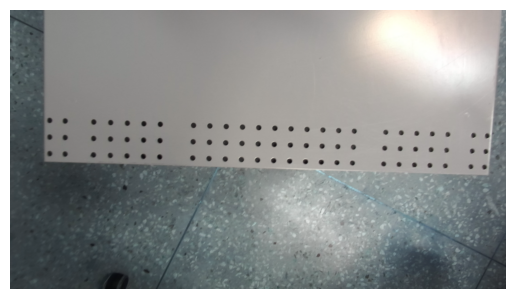

In [219]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [220]:
img.shape

(621, 1104, 3)

In [221]:
mask = np.zeros(img.shape[:2], np.uint8)

In [222]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [223]:
rect = (0, 0, img.shape[1], 450)

In [224]:
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 25, cv2.GC_INIT_WITH_RECT)

(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[1.30342758e-01, 2.74828198e-01, 2.06901653e-01, 2.35920724e-01,
         1.52006667e-01, 1.63988418e+02, 1.69696889e+02, 1.68018763e+02,
         5.45743776e+01, 6.28065742e+01, 6.59315880e+01, 1.04095834e+02,
         1.16887924e+02, 1.19209792e+02, 7.84650097e+01, 9.02759675e+01,
         9.31103973e+01, 1.34651279e+02, 1.45524770e+02, 1.46435126e+02,
         2.93806486e+02, 2.88826576e+02, 2.84629813e+02, 2.88826576e+02,
         2.87199212e+02, 2.82874413e+02, 2.84629813e+02, 2.82874413e+02,
         2.79325553e+02, 6.71778687e+01, 7.65187371e+01, 7.69611704e+01,
         7.65187371e+01, 9.00504993e+01, 9.04322311e+01, 7.69611704e+01,
         9.04322311e+01, 9.16494364e+01, 1.23144774e+02, 1.28123473e+02,
         1.03455677e+02, 1.28123473e+02, 1.4

In [225]:
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img * mask2[:, :, np.newaxis]

In [226]:
cut = img

In [227]:
background = ori - img
background[np.where((background > [0, 0, 0]).all(axis = 2))] = [255, 255, 255]

In [228]:
img = background + img

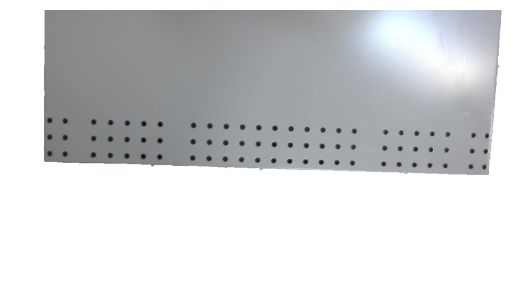

In [229]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [230]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

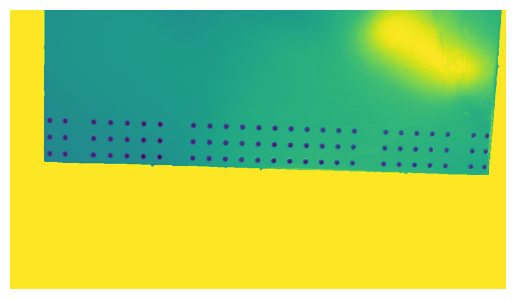

In [231]:
plt.imshow(gray)
plt.axis('off')
plt.show()

In [232]:
ret, thresh1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

In [233]:
bilateral = cv2.bilateralFilter(thresh1, 10, 75, 75)

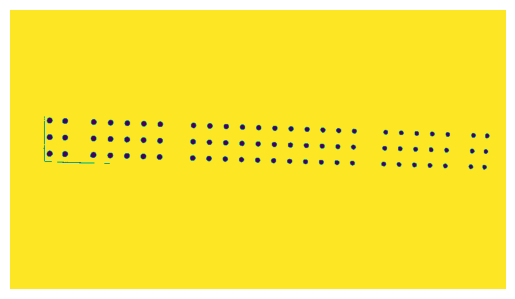

In [234]:
plt.imshow(bilateral)
plt.axis('off')
plt.show()

In [235]:
ret, thresh1 = cv2.threshold(bilateral, 0, 100, cv2.THRESH_BINARY_INV)

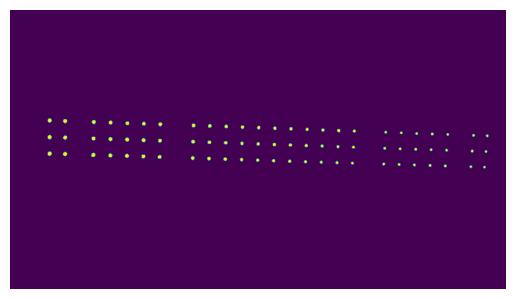

In [236]:
plt.imshow(thresh1)
plt.axis('off')
plt.show()

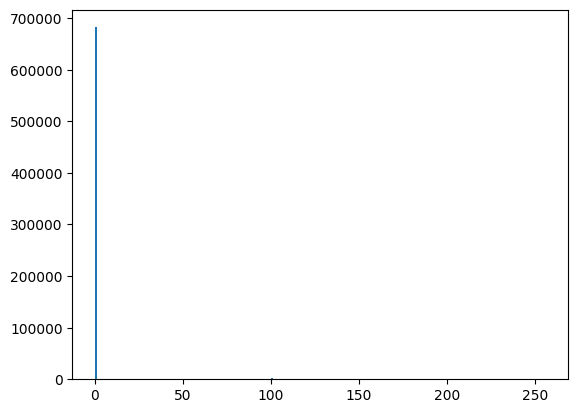

In [237]:
plt.hist(thresh1.ravel(), 256, [0, 256])
plt.show()